# Importing the Necessary Modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing the Dataset

In [4]:
file_name='house-price-data.csv'
df=pd.read_csv(file_name)

In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Wrangling

In [6]:
# Display the data types of each column.

df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.describe(include='all')

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10806.00000,4.580302e+09,NaN,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,NaN,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [8]:
# Drop the columns "id" and "Unnamed: 0".

df.drop(df[["id","Unnamed: 0"]], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Listing Missing Values

In [9]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

date
False    21613
Name: date, dtype: int64

price
False    21613
Name: price, dtype: int64

bedrooms
False    21600
True        13
Name: bedrooms, dtype: int64

bathrooms
False    21603
True        10
Name: bathrooms, dtype: int64

sqft_living
False    21613
Name: sqft_living, dtype: int64

sqft_lot
False    21613
Name: sqft_lot, dtype: int64

floors
False    21613
Name: floors, dtype: int64

waterfront
False    21613
Name: waterfront, dtype: int64

view
False    21613
Name: view, dtype: int64

condition
False    21613
Name: condition, dtype: int64

grade
False    21613
Name: grade, dtype: int64

sqft_above
False    21613
Name: sqft_above, dtype: int64

sqft_basement
False    21613
Name: sqft_basement, dtype: int64

yr_built
False    21613
Name: yr_built, dtype: int64

yr_renovated
False    21613
Name: yr_renovated, dtype: int64

zipcode
False    21613
Name: zipcode, dtype: int64

lat
False    21613
Name: lat, dtype: int64

long
False    21613
Name: long, dtype: int64

sqft_living15


In [10]:
# df["bedrooms"] and df["bathrooms"] have missing values

In [11]:
# Strategy: Replacing the missing values with the mean value for each.

mean_bathrooms = df["bathrooms"].astype("float").mean(axis=0)
df["bathrooms"].replace(np.nan, mean_bathrooms, inplace=True)

mean_bedrooms = df["bedrooms"].astype("float64").mean(axis=0)
df["bedrooms"].replace(np.nan,mean_bedrooms,inplace=True)

In [12]:
# Checking again

df["bedrooms"].isnull().sum()

0

In [13]:
df["bathrooms"].isnull().sum()

0

# Exploratory Data Analysis

In [14]:
# Count the number of houses with unique floor values.

# df.columns
df_houses_floors = df["floors"].value_counts().to_frame()
df_houses_floors.rename(columns = {"floors":"No. of Houses"}, inplace=True)
df_houses_floors.index.name = "Unique Floors"
df_houses_floors

,No. of Houses
Unique Floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


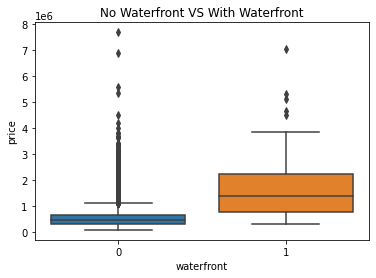

In [15]:
# Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

sns.boxplot(x='waterfront',y='price',data=df)
plt.title("No Waterfront VS With Waterfront")
plt.show()
# Houses without a waterfront have more price outliers!

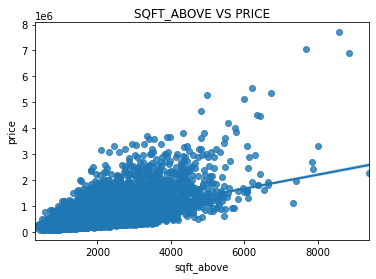

In [16]:
# Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

sns.regplot(x='sqft_above',y='price',data=df)
plt.title("SQFT_ABOVE VS PRICE")
plt.show()
# SQFT_ABOVE has a positive correlation with PRICE.

In [17]:
# Finding other correlating features excluding the target variable itself

df.corr()["price"].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Model Development

In [18]:
# Fit a Linear Regression Model

x = df[["long"]]
y = df["price"]
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y)
# Extremely poor fitting

0.00046769430149007363

In [19]:
# Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.

x = df[["sqft_living"]]
y = df["price"]
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y)
# Poor fitting of only 49.3%

0.4928532179037931

## Multivariate Linear Regression Model

In [20]:
# Fit a linear regression model to predict the 'price' using the list of features:

features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] ]
lm_multi = LinearRegression()
lm_multi.fit(features,y)
lm_multi.score(features,y)
# Fitting improves by adding more features!

0.6576528071996612

In [21]:
# Create a Pipeline and then check the fitting.

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(features,y)

pipe.score(features,y)

# Still improves! Good!

0.7501471816495382

# Model Evaluation and Refinement

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [23]:
# Split into Train-Test. Use 15% of the data for testing.

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    

X = df[features]
Y = df['price']

x_train , x_test , y_train , y_test = train_test_split (X , Y , test_size = 0.15 , random_state = 1)

In [24]:
x_test.shape[0]

3242

In [25]:
x_train.shape[0]

18371

In [26]:
# Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

from sklearn.linear_model import Ridge
RidgeModel = Ridge (alpha = 0.1)
RidgeModel.fit (x_train , y_train)
RidgeModel.score(x_test,y_test)

0.6478759163939112

In [27]:
# Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
pollyfit = Ridge(alpha=0.1)
pollyfit.fit(x_train_pr , y_train)
pollyfit.score(x_test_pr,y_test)

0.7002744262014625